In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,BatchNormalization
from keras.utils import plot_model


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

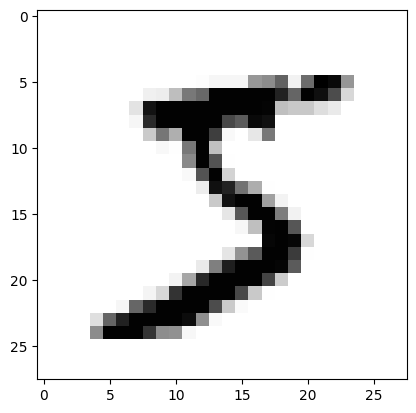

In [6]:
plt.imshow(x_train[0],cmap='Greys')

In [7]:
# standardization
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

x_train.shape[1:]

(28, 28, 1)

In [12]:
model = Sequential()
model.add(Conv2D(132,kernel_size=(4,4),strides=(1,1),name='conv_layer_1',activation='relu',input_shape = x_train.shape[1:],padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,kernel_size=(4,4),strides=(1,1),name='conv_layer_2',activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,kernel_size=(4,4),strides=(1,1),name='conv_layer_3',activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 28, 28, 132)       2244      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 132)      528       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 132)      0         
 )                                                               
                                                                 
 conv_layer_2 (Conv2D)       (None, 14, 14, 64)        135232    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
import time
x=time.time()
trained_model = model.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)
y=time.time()
print('time taken is ',y-x)

Epoch 1/30
375/375 [==============================] - 14s 28ms/step - loss: 0.2296 - accuracy: 0.9300 - val_loss: 0.8198 - val_accuracy: 0.6927
Epoch 2/30
375/375 [==============================] - 10s 27ms/step - loss: 0.0631 - accuracy: 0.9816 - val_loss: 0.0498 - val_accuracy: 0.9877
Epoch 3/30
375/375 [==============================] - 10s 27ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.0450 - val_accuracy: 0.9870
Epoch 4/30
375/375 [==============================] - 10s 27ms/step - loss: 0.0325 - accuracy: 0.9905 - val_loss: 0.0500 - val_accuracy: 0.9877
Epoch 5/30
375/375 [==============================] - 11s 28ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 6/30
375/375 [==============================] - 10s 28ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0497 - val_accuracy: 0.9879
Epoch 7/30
375/375 [==============================] - 10s 28ms/step - loss: 0.0226 - accuracy: 0.9933 - val_loss: 0.0355 - val_accuracy:

In [16]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [17]:
y_pred = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y_test,y_pred)

In [20]:
accuracy

0.9941

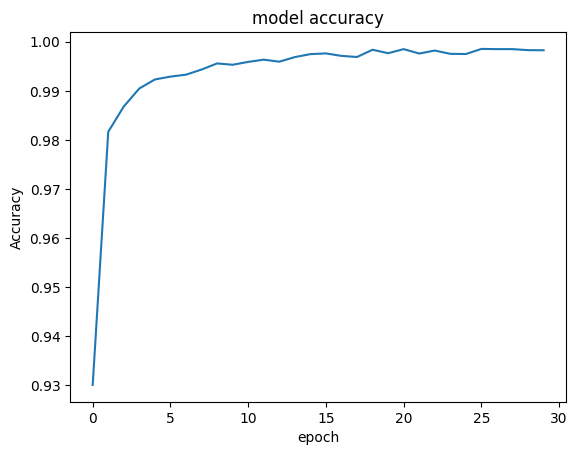

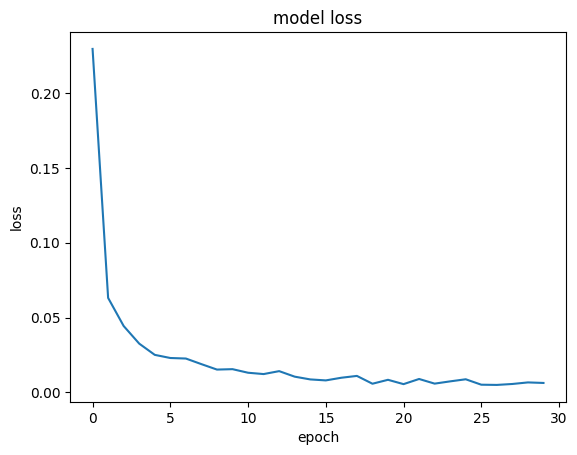

In [21]:
plt.plot(trained_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(trained_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [22]:
tf.keras.models.save_model(model,'my_model.hdf5')